In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
    import powerlaw 
    import mpmath
except:
    !pip install powerlaw
    !pip install mpmath
    import mpmath
    import powerlaw 
import scipy as sp
%matplotlib inline

In [2]:
def makeNetworkFromFiles(fedges, fnodes,deli):
    ''' Generate a network from csv files.
    The first column of the nodes file is taken to be the id by default.
    The nodes file must contain columns named weight, source, and target.
    The deli parameter is the delimeter of the file. '''
    G = nx.DiGraph()  #modified from lecture 12 
    fn=pd.read_csv(fnodes,delimiter=deli,index_col=0).transpose()
    n_attr=len(fn.index.values)
    attr=fn.index.values
    for n in fn.columns:
        attr_node=dict(list(zip(attr, fn[n].values)))
        G.add_node(n,attr_dic=attr_node)
    fl=pd.read_csv(fedges,delimiter=deli)
    fl.columns = list(map(str.lower, fl.columns))
    for L in fl.index.values:
        G.add_edge(fl['source'][L],fl['target'][L],weight=fl['weight'][L])
    #GL = max(nx.connected_component_subgraphs(G), key=len) ## no implemented for directed graph
    return G

In [3]:
def remove_values_from_list(the_list, val):
    return [value for value in the_list if value != val]

In [4]:
#data = np.array(pd.read_csv('THE_LINKS.txt',sep=' ',header=0))
#g = nx.DiGraph()
#for row in data:
 #   g.add_edge(row[0],row[1],weight=row[3])
degrees = []
out_weighted = []
out_d= []
in_weighted = []
in_d= []
g= makeNetworkFromFiles('Air_Data [Edges].csv', 'Air_Data [Nodes].csv',',')
#g= makeNetworkFromFiles('SchoolEdges.csv', 'SchoolNodes.csv',' ')
#g=makeNetworkFromFiles('USCommuting_LINKS.csv', 'USCommuting_NODES.csv',' ')

degrees=list(dict(g.degree()).values()) 
out_d=list(dict(g.out_degree()).values())
in_d=list(dict(g.in_degree()).values())

######NEED to eliminate ZEROS
in_d=remove_values_from_list(in_d,0)
out_d=remove_values_from_list(out_d,0)

out_weighted=list(dict(g.out_degree(weight='weight')).values())
in_weighted=list(dict(g.in_degree(weight='weight')).values())
######NEED to elkminate ZEROS
out_weighted=remove_values_from_list(out_weighted,0)
in_weighted=remove_values_from_list(in_weighted,0)

In [5]:
min(in_weighted)

0.0009

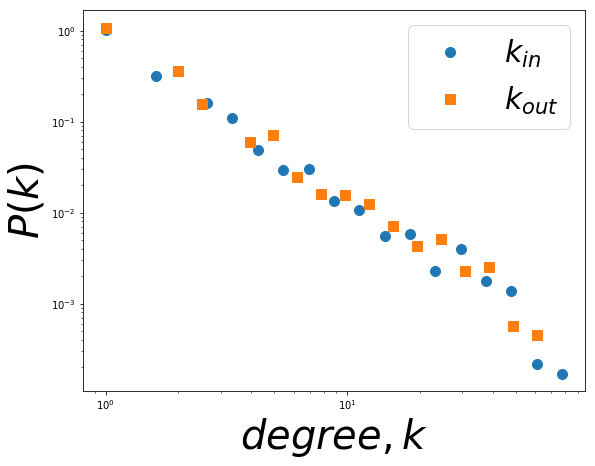

In [6]:
#plt.hist(out_weighted,log=True)
#plt.yscale('log')
#plt.xscale('log')
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = 20

#n, bins = np.histogram(out_d, bins = range(min(out_d), max(out_d)+1, 2), normed="True") 
out_logBins = np.logspace(np.log10(min(out_d)), np.log10(max(out_d)),num=n_bins)
out_logBinDensity, out_binedges = np.histogram(out_d, bins=out_logBins, density=True)

#n, bins = np.histogram(in_d, bins = range(min(in_d), max(in_d)+1, 2), normed="True") 
in_logBins = np.logspace(np.log10(min(in_d)), np.log10(max(in_d)),num=n_bins)
in_logBinDensity, in_binedges = np.histogram(in_d, bins=in_logBins, density=True)

ax.loglog(out_logBins[:-1],out_logBinDensity,'o', markersize=10,label=r'$k_{in}$')
ax.loglog(in_logBins[:-1],in_logBinDensity,'s', markersize=10,label=r'$k_{out}$')
ax.legend(fontsize=30)


ax.set_xlabel('$degree, k$',fontsize=40)
ax.set_ylabel('$P(k)$',fontsize=40) 
plt.savefig("distributions.eps",dpi=200,bbox_inches='tight')

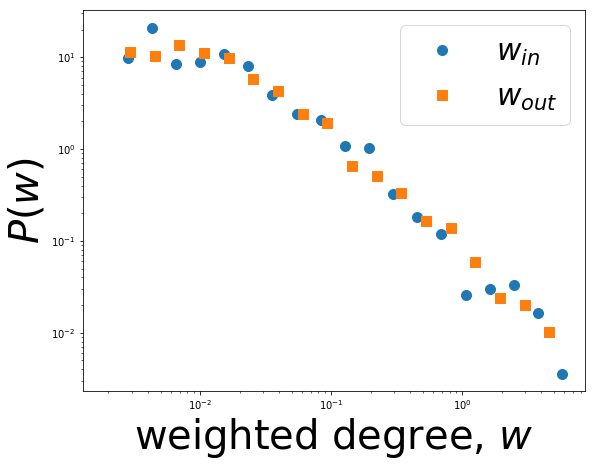

In [7]:
#plt.hist(out_weighted,log=True)
#plt.yscale('log')
#plt.xscale('log')
fig, ax = plt.subplots()
fig.set_size_inches((9, 7))

n_bins = 20

#n, bins = np.histogram(out_weighted, bins = range(min(out_weighted), max(out_weighted)+1, 2), normed="True") 
out_logBins = np.logspace(np.log10(min(out_weighted)+0.001), np.log10(max(out_weighted)),num=n_bins)
out_logBinDensity, out_binedges = np.histogram(out_weighted, bins=out_logBins, density=True)

#n, bins = np.histogram(in_weighted, bins = range(min(in_weighted), max(in_weighted)+1, 2), normed="True") 
in_logBins = np.logspace(np.log10(min(in_weighted)+0.001), np.log10(max(in_weighted)),num=n_bins)
in_logBinDensity, in_binedges = np.histogram(in_weighted, bins=in_logBins, density=True)

ax.loglog(out_logBins[:-1],out_logBinDensity,'o', markersize=10,label=r'$w_{in}$')
ax.loglog(in_logBins[:-1],in_logBinDensity,'s', markersize=10,label=r'$w_{out}$')
ax.legend(fontsize=30)


ax.set_xlabel('weighted degree, $w$',fontsize=40)
ax.set_ylabel('$P(w)$',fontsize=40) 
plt.savefig("weighted.eps",dpi=200,bbox_inches='tight')

In [14]:
kk = []
wij = []
degrees = g.degree()
for n in g.nodes(data=True):
    for e in g.edges(n[0],data=True):
        kk.append(degrees[e[0]]*degrees[e[1]])
        wij.append(g[e[0]][e[1]]['weight'])
    

In [15]:
n_bins = 40
kk_logBins = np.logspace(np.log10(min(kk)), np.log10(max(kk)),num=n_bins)
counts, bins = np.histogram(kk, bins=kk_logBins);
sums, bins = np.histogram(kk, bins=kk_logBins,weights=wij);
avg_w = sums/counts;

/Users/marta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


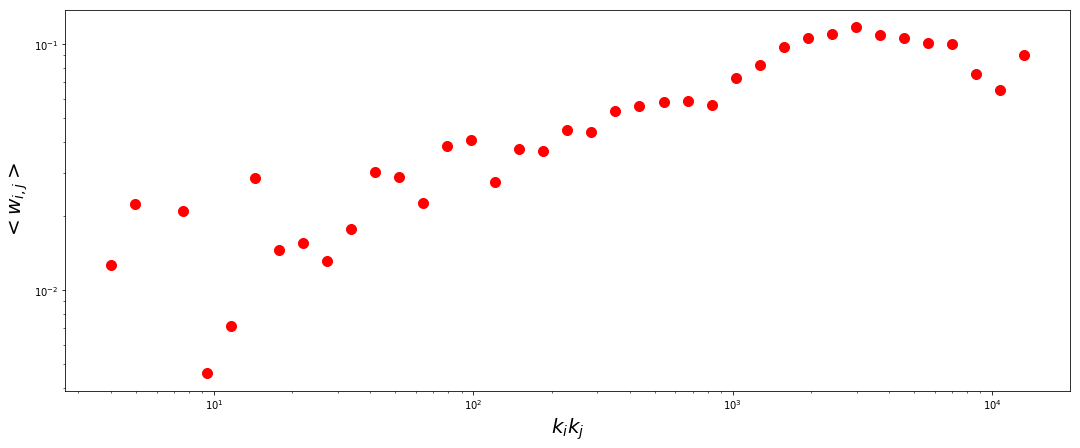

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches((18, 7))
ax.loglog(bins[:-1],avg_w,linewidth=0,color='r',marker='o',markersize=10)
ax.set_xlabel('$k_ik_j$',fontsize=20)
ax.set_ylabel('$<w_{i,j}>$',fontsize=20)
plt.savefig("commutes_directed_.eps",dpi=200,bbox_inches='tight')